In [25]:
# importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import nltk
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [26]:
# loading the dataset

df = pd.read_csv('review.csv')
df.head()

,Unnamed: 0,product_id,product_title,summary,review,location,date,upvotes,downvotes,score
0,0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276,0
1,1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133,0
2,2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328,0
3,3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28,0
4,4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114,0


In [27]:
# dropping the unwanted columns

df = df[['summary', 'review', 'location', 'score']]
df.head()

,summary,review,location,score
0,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,0
1,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,0
2,Super!,Very much satisfied with the device at this pr...,Kozhikode,0
3,Super!,"Nice headphone, bass was very good and sound i...",Jaora,0
4,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,0


In [28]:
# checking the shape

df.shape

(9374, 4)

In [29]:
# checking for duplicates

df.duplicated().sum()

1032

In [30]:
# dropping the duplicates

df = df.drop_duplicates().reset_index(drop = True)
df.head()

,summary,review,location,score
0,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,0
1,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,0
2,Super!,Very much satisfied with the device at this pr...,Kozhikode,0
3,Super!,"Nice headphone, bass was very good and sound i...",Jaora,0
4,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,0


In [31]:
# checking for null values

df.isnull().sum()

summary        0
review         0
location    1082
score          0
dtype: int64

In [32]:
# dropping the duplicates

df = df.dropna().reset_index(drop = True)
df.head()

,summary,review,location,score
0,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,0
1,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,0
2,Super!,Very much satisfied with the device at this pr...,Kozhikode,0
3,Super!,"Nice headphone, bass was very good and sound i...",Jaora,0
4,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,0


In [33]:
df.shape

(7260, 4)

In [34]:
df.head()

,summary,review,location,score
0,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,0
1,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,0
2,Super!,Very much satisfied with the device at this pr...,Kozhikode,0
3,Super!,"Nice headphone, bass was very good and sound i...",Jaora,0
4,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,0


# Analysing the score column

In [35]:
# 0 ----> Positive
# 1 ----> Negative

df['score'].value_counts()

score
0    6237
1    1023
Name: count, dtype: int64

Since it is a unbalanced data, we are going to balanace the data using sampling method.

In [36]:
pos = df[df['score']==0].sample(1000)
neg = df[df['score']==1]
df = pd.concat([pos,neg])
df = df.sample(frac = 1)
df.head()

,summary,review,location,score
5115,Could be way better,After 1day of use I am writing this reviewBuil...,Gangarampur,1
1262,Super!,nice all nice good product super this Bluetoot...,Asifabad,0
462,Worst experience ever!,not recommended bcoz first 1 month it was good...,Bengaluru,1
1642,Highly recommended,Nice product but,Abohar,0
3924,Worthless,Everything is good but speakers are not workin...,Bengaluru,1


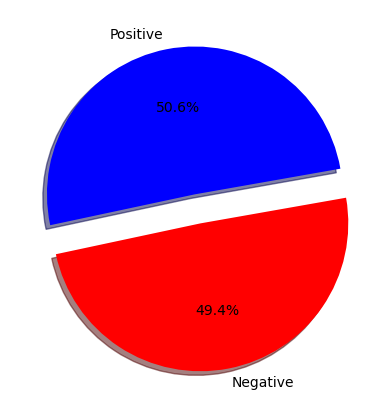

In [37]:
plt.pie(df['score'].value_counts(), 
        labels = ['Positive', 'Negative'],
       colors = ['blue', 'red'], explode =[0,0.2] ,shadow = True, autopct = '%0.1f%%', startangle = 10)
plt.show()

# Analysing the location column

In [38]:
df['location'].value_counts()

location
New Delhi         79
Bengaluru         77
Mumbai            63
Hyderabad         58
Kolkata           52
                  ..
Pollachi           1
Bermo              1
Robertsganj        1
Haora District     1
Shimla             1
Name: count, Length: 914, dtype: int64

Since there are many locations. we are only taking te locations which has more than 50 counts and making the reamining data as others.

In [39]:
value = df['location'].value_counts()
value = value[value>50]
df['location'] = df['location'].apply(lambda x: x if x in value else 'other')
df.head()

,summary,review,location,score
5115,Could be way better,After 1day of use I am writing this reviewBuil...,other,1
1262,Super!,nice all nice good product super this Bluetoot...,other,0
462,Worst experience ever!,not recommended bcoz first 1 month it was good...,Bengaluru,1
1642,Highly recommended,Nice product but,other,0
3924,Worthless,Everything is good but speakers are not workin...,Bengaluru,1


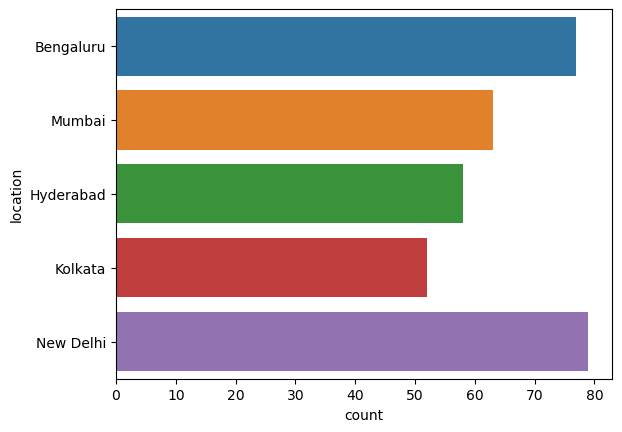

In [40]:
sns.countplot(data = df[df['location']!='other'], y = 'location')
plt.show()

In [41]:
df = df.reset_index(drop = True)
df.head()

,summary,review,location,score
0,Could be way better,After 1day of use I am writing this reviewBuil...,other,1
1,Super!,nice all nice good product super this Bluetoot...,other,0
2,Worst experience ever!,not recommended bcoz first 1 month it was good...,Bengaluru,1
3,Highly recommended,Nice product but,other,0
4,Worthless,Everything is good but speakers are not workin...,Bengaluru,1


In [42]:
# creating a new column Character length

df['char_length'] = df['review'].apply(lambda x: len(x))
df.head()

,summary,review,location,score,char_length
0,Could be way better,After 1day of use I am writing this reviewBuil...,other,1,494
1,Super!,nice all nice good product super this Bluetoot...,other,0,105
2,Worst experience ever!,not recommended bcoz first 1 month it was good...,Bengaluru,1,113
3,Highly recommended,Nice product but,other,0,16
4,Worthless,Everything is good but speakers are not workin...,Bengaluru,1,158


# Analyzing the length column

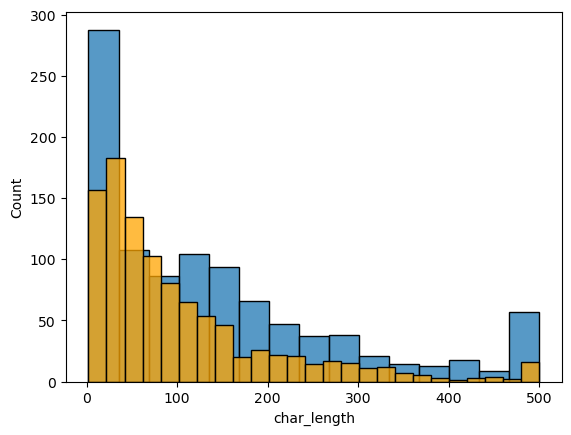

In [43]:
# Character length

sns.histplot(data  = df[df['score']==0], x = 'char_length')
sns.histplot(data  = df[df['score']==1], x = 'char_length', color = 'orange')
plt.show()

From the graph it is clear that the length of positive command is higher than negative commands

In [44]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
port = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def porter(x):
    x = x.lower()
    x = re.sub('[^a-zA-Z]', ' ', x)
    x = x.split()
    y = []
    for i in x:
        if i not in stopwords.words('english'):
            y.append(port.stem(i))
    review =' '.join(y)

    return review

In [46]:
from tqdm import tqdm
tqdm.pandas()
df['clean'] = (df['summary']+' '+df['review']).progress_apply(porter)

100%|█████████████████████████████████████████████████████████████████████████████| 2023/2023 [00:20<00:00, 100.00it/s]


In [171]:
# Word cloud

from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')

def cleanning(x):
    x = x.lower()
    x = re.sub('[^a-zA-Z]', ' ', x)
    x = x.split()
    y = []
    for i in x:
        if i not in stopwords.words('english'):
            y.append(i)
    return y

pos = df[df['score']==0]['review'].str.cat(sep = ' ').split()
neg = df[df['score']==1]['review'].str.cat(sep = ' ').split()

poss = cleanning(' '.join(pos))
negs = cleanning(' '.join(neg))

neg_words = []
pos_words = []

for i in poss:
    if i not in negs:
        pos_words.append(i)
        
for i in negs:
    if i not in poss:
        neg_words.append(i)

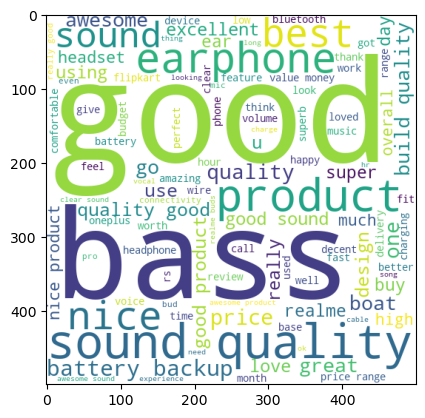

In [172]:
# positive cloud

pos = wc.generate(' '.join(poss))
plt.imshow(pos)
plt.show()

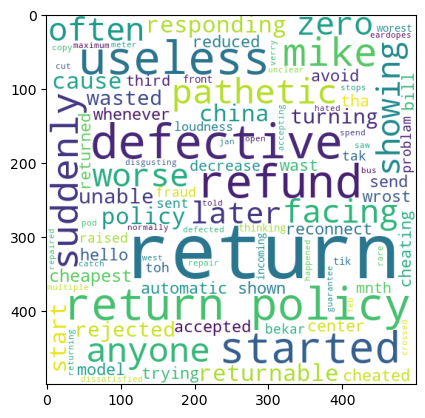

In [173]:
# negative cloud

neg = wc.generate(' '.join(neg_words))
plt.imshow(neg)
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(df['clean']).toarray()
X.shape

(2023, 2573)

In [52]:
Y = df['score'].values
Y.shape

(2023,)

In [53]:
# splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=15)

In [54]:
models = {'Logistice Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'KNN': KNeighborsClassifier(),
         'Gaussian NB': GaussianNB(),
         'Bernoulli NB': BernoulliNB(),
         'Mulitnomial NB': MultinomialNB(),
          'XG Boost': XGBClassifier()
         }


acc = []
f1 = []
model_name = []
def evaluation(models):
    for i , j in models.items():
        model = j
        model.fit(X_train, Y_train)
        pre = model.predict(X_test)
        acc.append(accuracy_score(pre, Y_test))
        f1.append(f1_score(pre, Y_test))
        model_name.append(i)

evaluation(models)
data = pd.DataFrame(acc, columns = ['Accuracy_score'])
data['F1_score'] = f1
data['Model'] = model_name
data[['Model', 'Accuracy_score', 'F1_score']].sort_values(by = 'Accuracy_score',ascending= False)

,Model,Accuracy_score,F1_score
0,Logistice Regression,0.965432,0.966507
1,Random Forest,0.965432,0.966346
7,XG Boost,0.955556,0.956311
6,Mulitnomial NB,0.953086,0.953995
5,Bernoulli NB,0.945679,0.947619
2,Decision Tree,0.913580,0.915663
3,KNN,0.911111,0.911765
4,Gaussian NB,0.718519,0.772908


In [55]:
model = XGBClassifier()
model.fit(X_train, Y_train)
pre = model.predict(X_test)
print('Accuracy : ',accuracy_score(pre, Y_test))
print('F1 score : ',f1_score(pre, Y_test))

Accuracy :  0.9555555555555556
F1 score :  0.9563106796116505
